# Task 3
#### Project ID - #CC69847
#### Project Title - Customer Segmentation Tool
#### Project Level - Golden Level
#### Project Details:
#### Aim -
> Develop a UI for users to input customer data. Use clustering algorithms to segment customers based on behavior.
#### Description: 
> Design a UI for customer data input and apply clustering (e.g., K-Means) to categorize customers.
#### Technologies: 
> Python, Streamlit for UI, Scikit-Learn for machine learning.

## 1. Reading and Understanding of Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df['Gender']= df['Gender'].replace({'Male': 0, 'Female': 1})

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## 2. Data Preprocessing

### 2.1 Missing Values Check

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

> There are no missing values

## 3. Feature Analysis

### 3.1 Gender Distribution

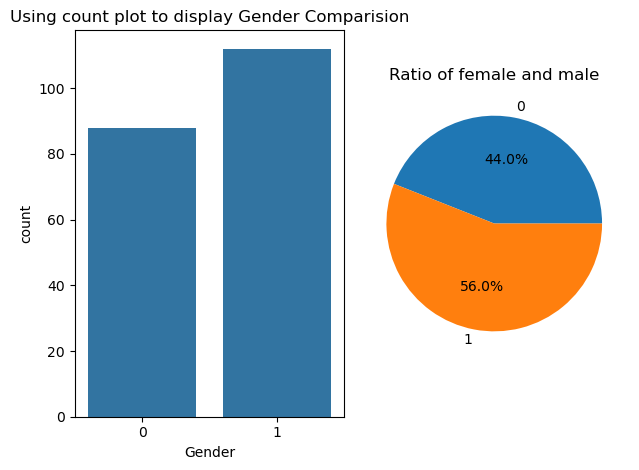

In [9]:
_, (ax1, ax2) = plt.subplots(ncols=2)

sns.countplot(x="Gender", data=df, ax=ax1)
ax1.set_title("Using count plot to display Gender Comparision")

df.groupby("Gender").size().plot.pie(autopct="%.1f%%", ax=ax2)
ax2.set_title("Ratio of female and male")
ax2.set_ylabel("")

plt.tight_layout()

>> There are sightly more Female entries than Male.

### 3.2 Distribution Plots

In [10]:
def distribution_plots(data, column, bins, color=None):
    _, (ax1, ax2) = plt.subplots(nrows=2)

    # Seaborn's histplot can combine a histogram and a density estimation function
    # in one single plot.
    sns.histplot(x=column, data=data, kde=True, bins=bins, color=color, ax=ax1)
    ax1.set_title(f"Distribution of {column} feature")

    sns.boxplot(x=column, data=data, color=color, ax=ax2)
    ax2.set_title(f"Boxplot for Descriptive Analysis of {column} feature")

    plt.tight_layout()

#### 3.2.1 Age Distribution

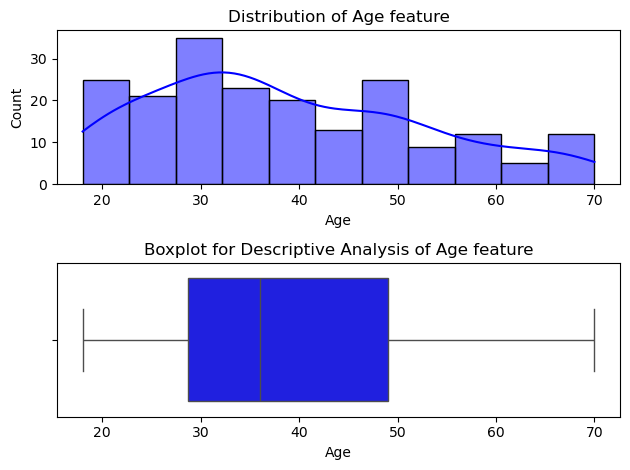

In [11]:
distribution_plots(df, "Age", bins=11, color="blue")

Insights -

1. 50% of the customers have between 28 and 49 years old, and the age average is about 36 years.

2. The younger customer and the older customer have 18 and 70 years old, respectively.

#### 3.2.2 Annual Income of the Customers

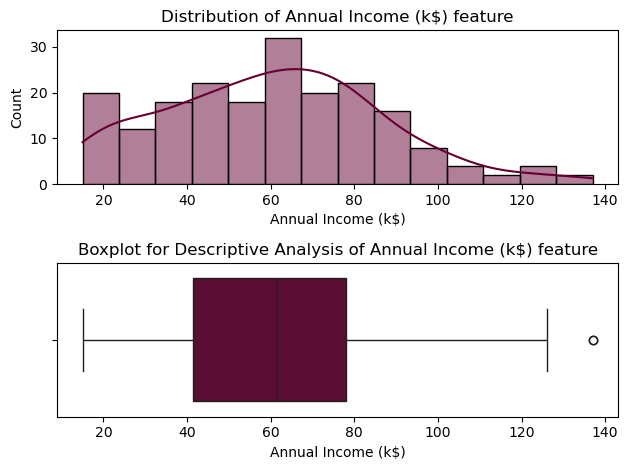

In [12]:
distribution_plots(df, "Annual Income (k$)", bins=14, color="#660033")

> Insights -

1. 50% of the consumers have annual income between 41,5 k$ and 78 k$, and the average income is about 61,5 k$.

2. The minimum user income is of 15 k$ and the maximum is of 137 k$.

#### 3.2.3 Spending Score of the Customers

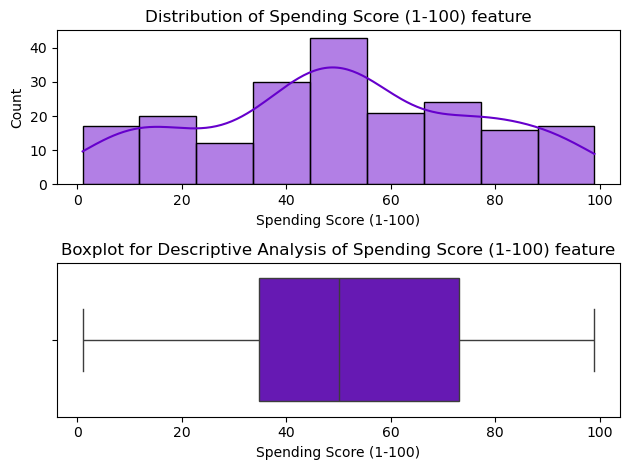

In [13]:
distribution_plots(df, "Spending Score (1-100)", bins=9, color="#6600cc")

> 50% of the customers have the score between 35 and 73, with the mean score of approximately 50.

## 4. Customer Base Clustering

In [14]:
from sklearn.cluster import KMeans

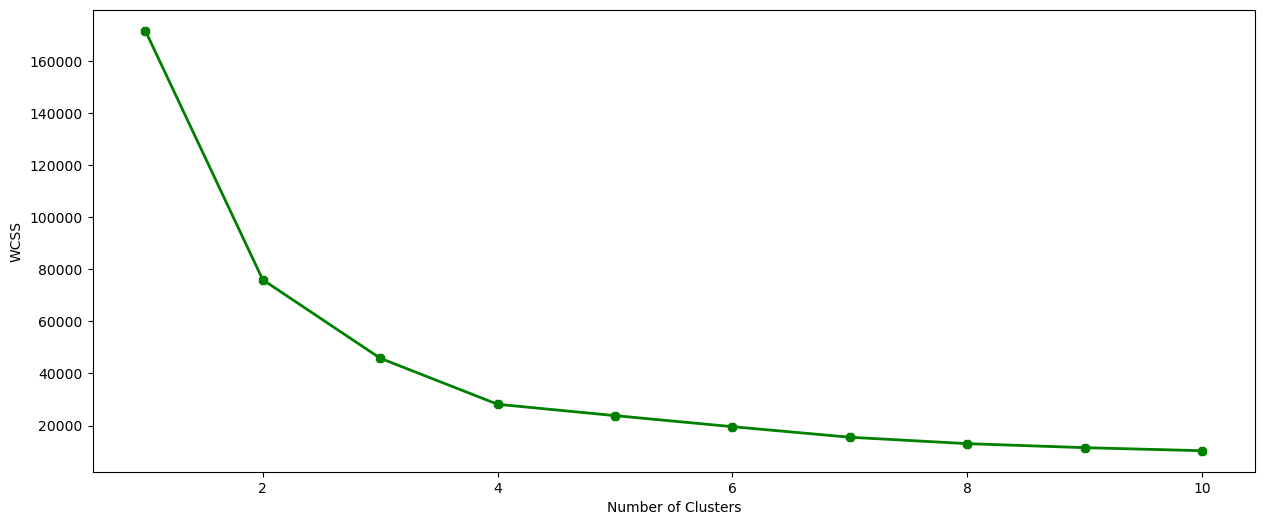

In [15]:
# Extracting the required columns and converting them to a numpy array
A1 = df[['Age', 'Spending Score (1-100)']].to_numpy()

# List to store the within-cluster sum of squares (WCSS) values
wcss = []

# Loop to calculate WCSS for different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(A1)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.figure(figsize=(15, 6))
plt.plot(range(1, 11), wcss, color='green', linewidth=2, marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 4)
label1 = kmeans.fit_predict(A1)
print(label1)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [17]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


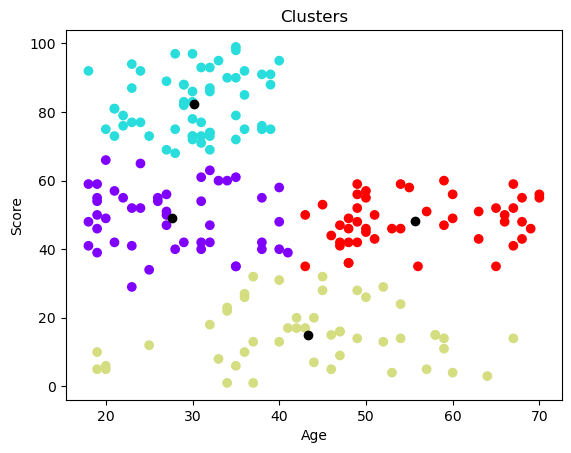

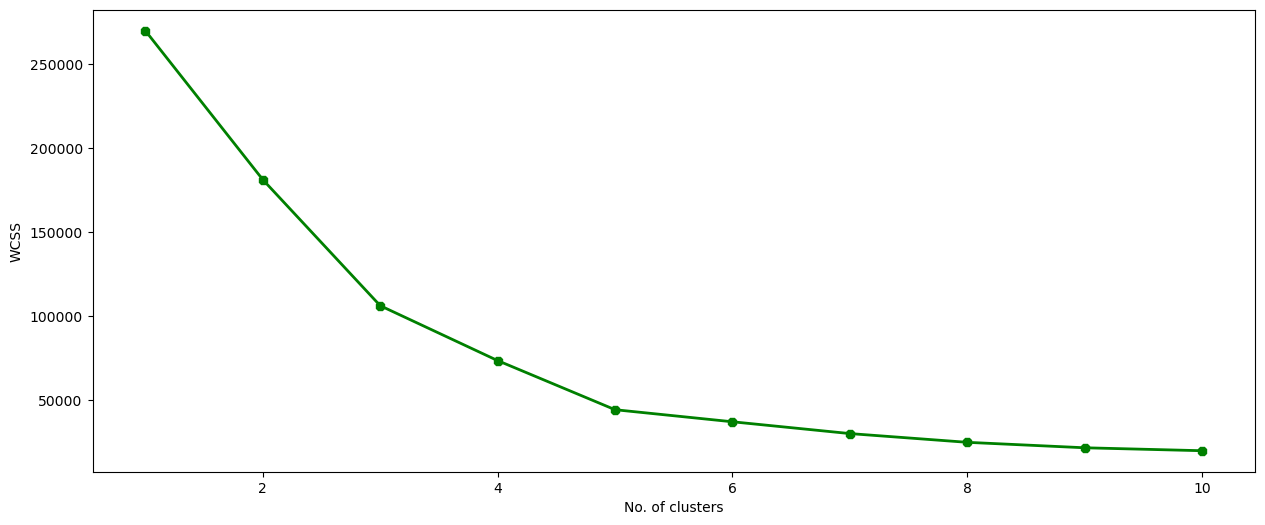

In [18]:
plt.scatter(A1[:,0], A1[:,1], c = label1, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Score")
A2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(A2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 6))
plt.plot(range(1,11), wcss, linewidth = 2, color = "green", marker = "8")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()
plt.show()

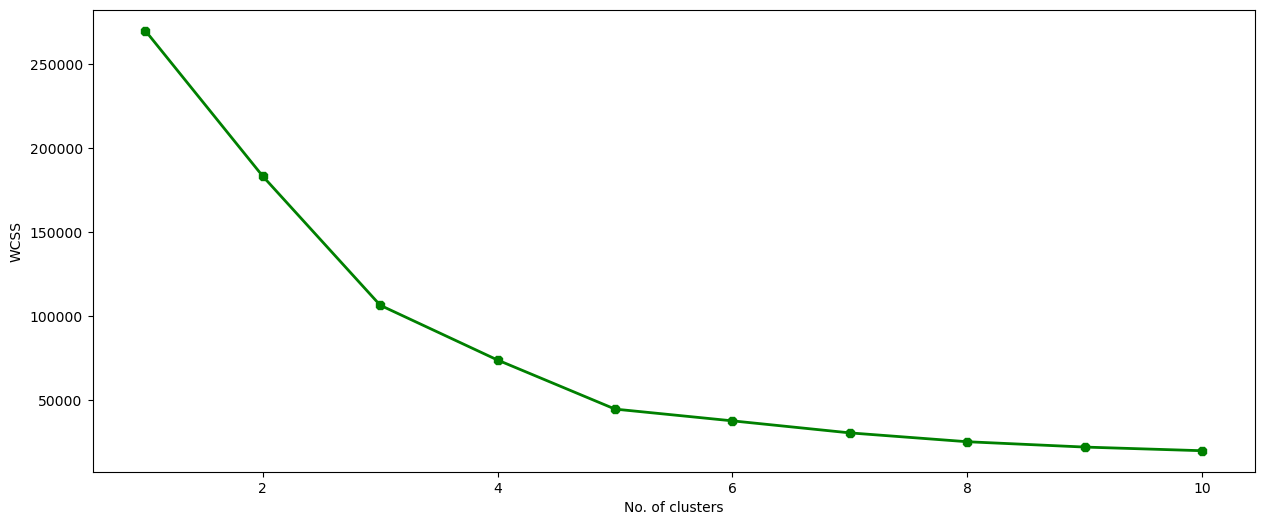

In [19]:
A2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(A2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 6))
plt.plot(range(1,11), wcss, linewidth = 2, color = "green", marker = "8")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans1 = KMeans(n_clusters = 5)
label2 = kmeans1.fit_predict(A2)
print(label2)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [21]:
print(kmeans1.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


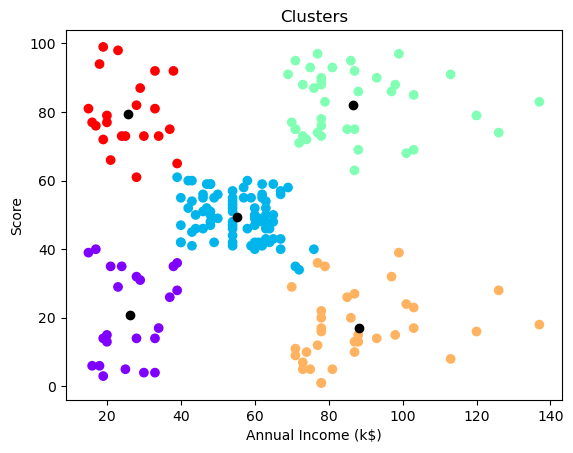

In [22]:
plt.scatter(A2[:,0], A2[:,1], c = label2, cmap = "rainbow")
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], color = "black")
plt.title("Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Score")
plt.show()

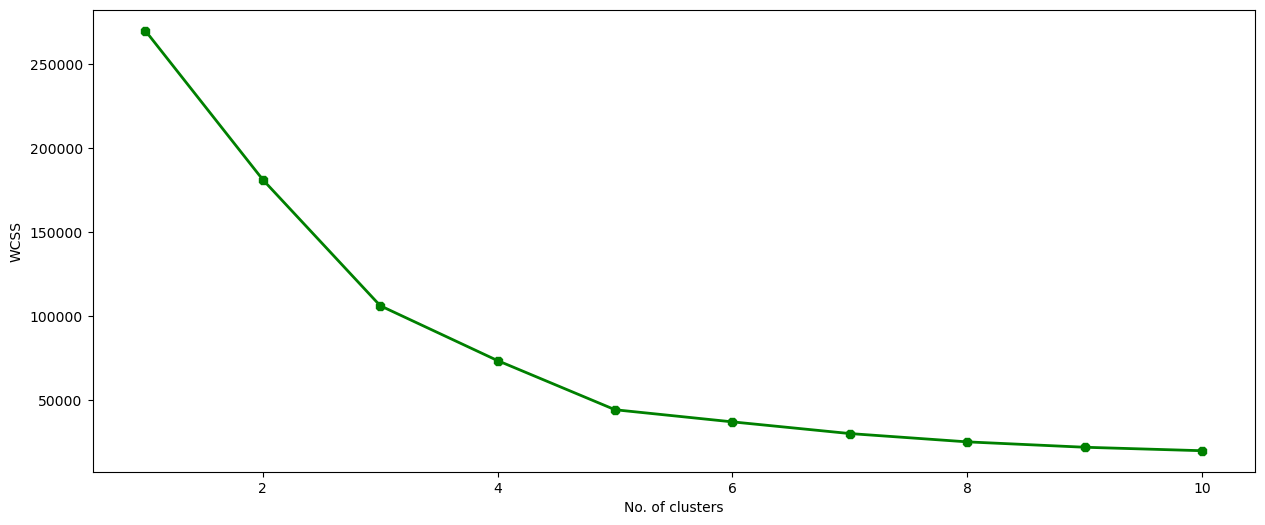

In [23]:
A3 = df.iloc[:,2:]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(A3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15,6))
plt. plot(range(1,11), wcss, linewidth = 2, color = "green", marker = "8")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans2 = KMeans(n_clusters = 5)
label3 = kmeans2.fit_predict(A3)
print(label3)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [25]:
print(kmeans2.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [26]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit(X)

In [27]:
import joblib
joblib.dump(Y, 'kmeans_model.pkl')

['kmeans_model.pkl']

Inertia: 75378.76464074483
Silhouette Score: 0.44446409171786105


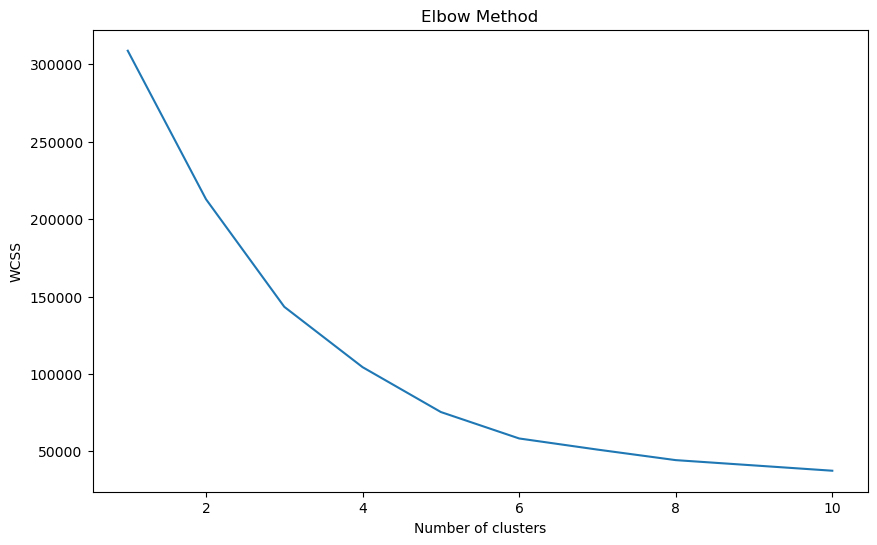

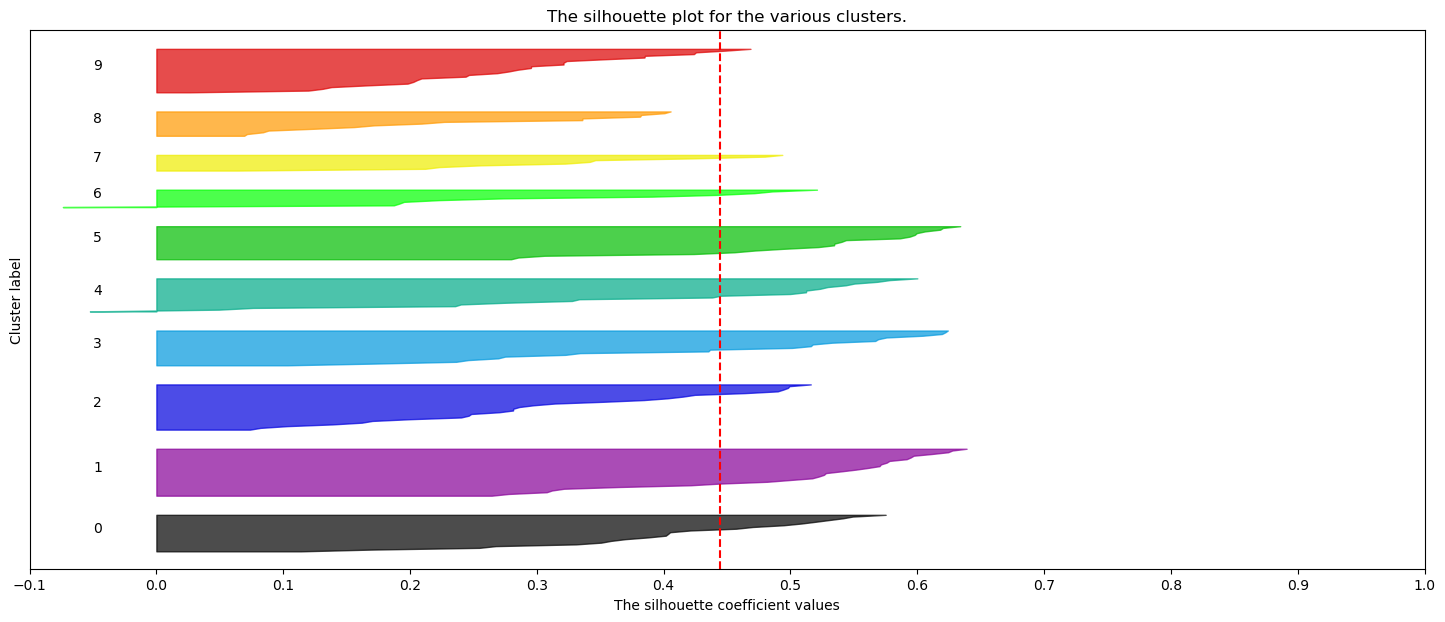

In [28]:
from sklearn.metrics import silhouette_score, silhouette_samples
def evaluate_model(X, kmeans):
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette_avg}")
    
    # Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    # Silhouette Analysis
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (kmeans.n_clusters + 1) * 10])
    
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    for i in range(kmeans.n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([i / 10 for i in range(-1, 11)])
    plt.show()
    
evaluate_model(X, Y)

> A silhouette score of 0.44 is moderately good. It indicates that the clusters are reasonably well-defined, but there might be some overlap between clusters.